<a href="https://colab.research.google.com/github/Thomas-George-T/FBI-Uniform-Crime-Reporting-Analysis/blob/main/Data_Mining_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FBI Uniform Crime Reporting Analysis | 2012

*Authors: Bardia Mouhebat,
Thomas George Thomas,
Prachi Patel*

Team: Outliers


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


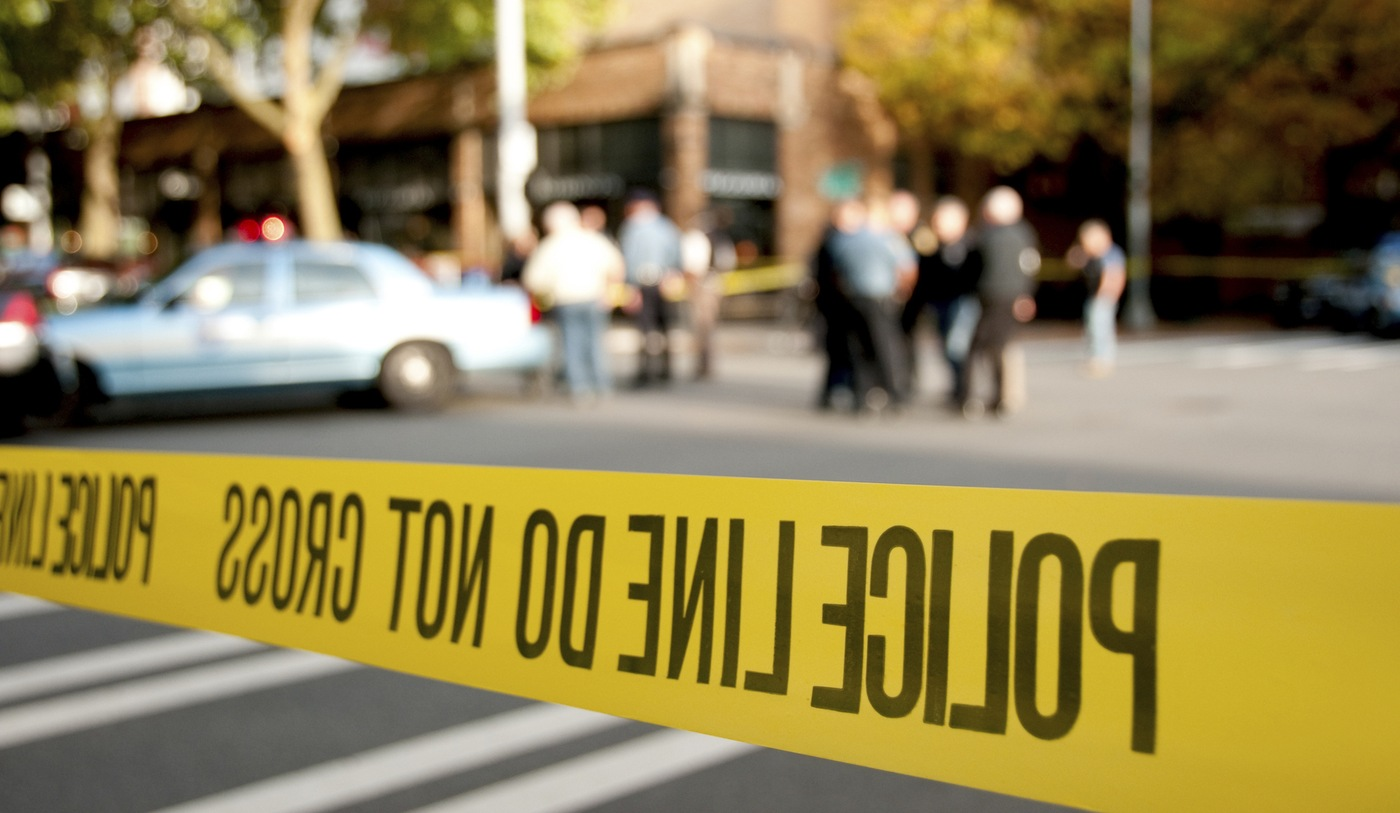

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **1- Importing libraries**
---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

># **2- Importing dataset**
---

In [ ]:
from google.colab import files
file = files.upload()


Saving U.S._Offense_Type_by_Agency_2012.xlsx to U.S._Offense_Type_by_Agency_2012.xlsx


In [ ]:
df2 = pd.read_excel("U.S._Offense_Type_by_Agency_2012.xlsx", skiprows=3, skipfooter=4, 
                   header=[1], 
                   index_col=[0,1,2,3])
df2.head()

Assault\nOffenses  \
State    Agency Type           Agency Name     Population1                      
ALABAMA  Cities                Hoover          82332                    870.0   
ARIZONA  Cities                Apache Junction 36986                    559.0   
                               Gilbert         214264                  1242.0   
         Metropolitan Counties Yuma2           214264                   555.0   
ARKANSAS Cities                Alma            5439                     197.0   

                                                            Aggravated\nAssault  \
State    Agency Type           Agency Name     Population1                        
ALABAMA  Cities                Hoover          82332                       25.0   
ARIZONA  Cities                Apache Junction 36986                       96.0   
                               Gilbert         214264                     123.0   
         Metropolitan Counties Yuma2           214264                      94.0   
ARKANSAS Cities                Alma            5439                        11.0   

                                                            Simple\nAssault  \
State    Agency Type           Agency Name     Population1                    
ALABAMA  Cities                Hoover          82332                  594.0   
ARIZONA  Cities                Apache Junction 36986                  381.0   
                               Gilbert         214264                 892.0   
         Metropolitan Counties Yuma2           214264                 376.0   
ARKANSAS Cities                Alma            5439                   108.0   

                                                            Intimidation  \
State    Agency Type           Agency Name     Population1                 
ALABAMA  Cities                Hoover          82332               251.0   
ARIZONA  Cities                Apache Junction 36986                82.0   
                               Gilbert         214264              227.0   
         Metropolitan Counties Yuma2           214264               85.0   
ARKANSAS Cities                Alma            5439                 78.0   

                                                            Homicide\nOffenses  \
State    Agency Type           Agency Name     Population1                       
ALABAMA  Cities                Hoover          82332                       2.0   
ARIZONA  Cities                Apache Junction 36986                       1.0   
                               Gilbert         214264                      5.0   
         Metropolitan Counties Yuma2           214264                     26.0   
ARKANSAS Cities                Alma            5439                        NaN   

                                                            Murder and Nonnegligent Manslaughter  \
State    Agency Type           Agency Name     Population1                                         
ALABAMA  Cities                Hoover          82332                                         2.0   
ARIZONA  Cities                Apache Junction 36986                                         1.0   
                               Gilbert         214264                                        5.0   
         Metropolitan Counties Yuma2           214264                                       26.0   
ARKANSAS Cities                Alma            5439                                          NaN   

                                                            Negligent\nManslaughter  \
State    Agency Type           Agency Name     Population1                            
ALABAMA  Cities                Hoover          82332                            NaN   
ARIZONA  Cities                Apache Junction 36986                            NaN   
                               Gilbert         214264                           NaN   
         Metropolitan Counties Yuma2           214264                           NaN   
ARKANSAS Cities          

In [ ]:
df_flattened=df2.reset_index()

In [ ]:
df_flattened.head()

,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


> # **3- Basic Text Data Pre-processing**
---

In [ ]:
df_flattened.columns = df_flattened.columns.str.replace('[\\n,1]', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df_flattened

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/ Wagering,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Porno- graphy/ Obscene Material,Prost- itution Offenses,Prost- itution,Assisting or Pro- moting Prost- itution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,WISCONSIN,Nonmetropolitan Counties,Sauk,6803,80.0,14.0,63.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5231,WISCONSIN,Nonmetropolitan Counties,Sawyer,6803,79.0,21.0,56.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,15.0
5232,WISCONSIN,Nonmetropolitan Counties,Vilas,6803,42.0,3.0,39.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
5233,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,6803,56.0,14.0,39.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


> # **4- Preparing Data for Exploratory Data Analysis (EDA)**

In [ ]:
df_flattened.value_counts

<bound method DataFrame.value_counts of           State               Agency Type       Agency Name  Population   \
0       ALABAMA                    Cities            Hoover        82332   
1       ARIZONA                    Cities   Apache Junction        36986   
2       ARIZONA                    Cities           Gilbert       214264   
3       ARIZONA     Metropolitan Counties             Yuma2       214264   
4      ARKANSAS                    Cities              Alma         5439   
...         ...                       ...               ...          ...   
5230  WISCONSIN  Nonmetropolitan Counties              Sauk         6803   
5231  WISCONSIN  Nonmetropolitan Counties            Sawyer         6803   
5232  WISCONSIN  Nonmetropolitan Counties             Vilas         6803   
5233  WISCONSIN   Other Agencies - Tribal     Oneida Tribal         6803   
5234  WISCONSIN   Other Agencies - Tribal  St. Croix Tribal         6803   

      Assault Offenses  Aggravated Assault  Sim

In [ ]:
df_flattened.shape

(5235, 59)

In [ ]:
df_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   State                                        5235 non-null   object 
 1   Agency Type                                  5235 non-null   object 
 2   Agency Name                                  5235 non-null   object 
 3   Population                                   5235 non-null   int64  
 4   Assault Offenses                             4773 non-null   float64
 5   Aggravated Assault                           4079 non-null   float64
 6   Simple Assault                               4647 non-null   float64
 7   Intimidation                                 3971 non-null   float64
 8   Homicide Offenses                            937 non-null    float64
 9   Murder and Nonnegligent Manslaughter         855 non-null    float64
 10  

In [ ]:
df_flattened.isna().sum()

State                                             0
Agency Type                                       0
Agency Name                                       0
Population                                        0
Assault Offenses                                462
Aggravated Assault                             1156
Simple Assault                                  588
Intimidation                                   1264
Homicide Offenses                              4298
Murder and Nonnegligent Manslaughter           4380
Negligent Manslaughter                         5086
Justifiable Homicide                           5156
Kidnapping/ Abduction                          3231
Sex Offenses                                   1592
Rape                                           2392
Sodomy                                         3716
Sexual Assault With An Object                  4400
Fondling                                       2286
Sex Offenses  Nonforcible                      3651
Incest      

In [ ]:
df_clean = df_flattened.replace(np.nan,0)

In [ ]:
df_clean.isna().sum()

State                                          0
Agency Type                                    0
Agency Name                                    0
Population                                     0
Assault Offenses                               0
Aggravated Assault                             0
Simple Assault                                 0
Intimidation                                   0
Homicide Offenses                              0
Murder and Nonnegligent Manslaughter           0
Negligent Manslaughter                         0
Justifiable Homicide                           0
Kidnapping/ Abduction                          0
Sex Offenses                                   0
Rape                                           0
Sodomy                                         0
Sexual Assault With An Object                  0
Fondling                                       0
Sex Offenses  Nonforcible                      0
Incest                                         0
Statutory Rape      

Downloading the cleaned dataset

In [ ]:
from google.colab import files
df_clean.to_csv('cleaned.csv') 
files.download('cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> # **5- Exploratory data analysis**

## Que - A

In [ ]:
QA = df_clean.iloc[:,0:8 ]
QA.head()

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0


In [ ]:
QA=QA[QA["Agency Type"]!="Cities"]
QA

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0
149,ARKANSAS,Universities and Colleges,"Arkansas State University, Jonesboro",13900,30.0,4.0,11.0,15.0
150,ARKANSAS,Universities and Colleges,Arkansas Tech University,10464,10.0,1.0,2.0,7.0
151,ARKANSAS,Universities and Colleges,Henderson State University,3774,18.0,2.0,9.0,7.0
152,ARKANSAS,Universities and Colleges,University of Arkansas:,3774,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5230,WISCONSIN,Nonmetropolitan Counties,Sauk,6803,80.0,14.0,63.0,3.0
5231,WISCONSIN,Nonmetropolitan Counties,Sawyer,6803,79.0,21.0,56.0,2.0
5232,WISCONSIN,Nonmetropolitan Counties,Vilas,6803,42.0,3.0,39.0,0.0
5233,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,6803,56.0,14.0,39.0,3.0


In [ ]:
q1 = QA.groupby('State').agg({'Assault Offenses':'sum','Aggravated Assault':'sum', 'Simple Assault':'sum', 'Intimidation':'sum'}).reset_index()
q1=q1.sort_values(by='Assault Offenses', ascending=False)
q1.head(5)

,State,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation
22,SOUTH CAROLINA,52862.0,10787.0,33657.0,8418.0
28,VIRGINIA,47129.0,3709.0,39389.0,4031.0
24,TENNESSEE,33657.0,6700.0,19922.0,7035.0
12,MICHIGAN,32420.0,4218.0,22784.0,5418.0
18,OHIO,20224.0,1448.0,8113.0,10663.0


**The above table represents the top 5 states with the highest Assault offenses**

# Que - B

In [ ]:
q2=df_clean[df_clean["Agency Type"]=="Universities and Colleges"]
q2

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/ Wagering,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Porno- graphy/ Obscene Material,Prost- itution Offenses,Prost- itution,Assisting or Pro- moting Prost- itution,Weapon Law Violations
149,ARKANSAS,Universities and Colleges,"Arkansas State University, Jonesboro",13900,30.0,4.0,11.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,ARKANSAS,Universities and Colleges,Arkansas Tech University,10464,10.0,1.0,2.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,ARKANSAS,Universities and Colleges,Henderson State University,3774,18.0,2.0,9.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,ARKANSAS,Universities and Colleges,University of Arkansas:,3774,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,ARKANSAS,Universities and Colleges,Fayetteville,23199,54.0,6.0,22.0,26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,WEST VIRGINIA,Universities and Colleges,Shepherd University,4393,6.0,0.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5022,WEST VIRGINIA,Universities and Colleges,West Liberty University,2789,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5023,WEST VIRGINIA,Universities and Colleges,West Virginia State University,2827,15.0,0.0,10.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5024,WEST VIRGINIA,Universities and Colleges,West Virginia University,29617,65.0,19.0,20.0,26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
q2 = q2.groupby('Agency Type').agg({'Assault Offenses':'sum','Homicide Offenses':'sum','Kidnapping/ Abduction':'sum', 'Sex Offenses':'sum','Sex Offenses  Nonforcible':'sum', 'Fraud Offenses':'sum', 'Arson':'sum', 'Bribery':'sum','Burglary/ Breaking & Entering':'sum','Counter- feiting/ Forgery':'sum','Destruction/ Damage/ Vandalism':'sum','Embezzle- ment':'sum','Extortion/ Blackmail':'sum', 'Fraud Offenses':'sum', 'Larceny- Theft Offenses':'sum',
                                    'Motor Vehicle Theft':'sum', 'Robbery':'sum','Stolen Property Offenses ':'sum', 'Drug/ Narcotic Offenses':'sum', 'Gambling Offenses':'sum', 'Porno- graphy/ Obscene Material':'sum','Prost- itution Offenses':'sum', 'Weapon Law Violations':'sum'}).reset_index()

In [ ]:
q2

,Agency Type,Assault Offenses,Homicide Offenses,Kidnapping/ Abduction,Sex Offenses,Sex Offenses Nonforcible,Fraud Offenses,Arson,Bribery,Burglary/ Breaking & Entering,...,Extortion/ Blackmail,Larceny- Theft Offenses,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Drug/ Narcotic Offenses,Gambling Offenses,Porno- graphy/ Obscene Material,Prost- itution Offenses,Weapon Law Violations
0,Universities and Colleges,4348.0,1.0,44.0,390.0,4.0,1125.0,140.0,2.0,2412.0,...,13.0,20630.0,405.0,176.0,278.0,9269.0,2.0,23.0,5.0,335.0


If we want to compare all the main categories "Larency theft offences" are the most common crimes with 20630 cases.

# Que - C

In [ ]:
QC=df_clean[df_clean["Agency Type"] == "Universities and Colleges"]

In [ ]:
QC= QC.iloc[:,2:]

In [ ]:
QC.head()

,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,Negligent Manslaughter,Justifiable Homicide,...,Gambling Offenses,Betting/ Wagering,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Porno- graphy/ Obscene Material,Prost- itution Offenses,Prost- itution,Assisting or Pro- moting Prost- itution,Weapon Law Violations
149,"Arkansas State University, Jonesboro",13900,30.0,4.0,11.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,Arkansas Tech University,10464,10.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,Henderson State University,3774,18.0,2.0,9.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,University of Arkansas:,3774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,Fayetteville,23199,54.0,6.0,22.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
QC.drop(QC.columns[[1]], axis=1, inplace=True)
QC.head()

,Agency Name,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,Negligent Manslaughter,Justifiable Homicide,Kidnapping/ Abduction,...,Gambling Offenses,Betting/ Wagering,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Porno- graphy/ Obscene Material,Prost- itution Offenses,Prost- itution,Assisting or Pro- moting Prost- itution,Weapon Law Violations
149,"Arkansas State University, Jonesboro",30.0,4.0,11.0,15.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150,Arkansas Tech University,10.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,Henderson State University,18.0,2.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,University of Arkansas:,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,Fayetteville,54.0,6.0,22.0,26.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
QC_1=pd.pivot_table(QC,index=["Agency Name"])
QC_1.head()

,Aggravated Assault,All Other Larceny,Arson,Assault Offenses,Assisting or Pro- moting Prost- itution,Betting/ Wagering,Bribery,Burglary/ Breaking & Entering,Counter- feiting/ Forgery,Credit Card/ Automated Teller Machine Fraud,...,Sports Tampering,Statutory Rape,Stolen Property Offenses,Theft From Building,Theft From Coin- operated Machine,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories,Weapon Law Violations,Welfare Fraud,Wire Fraud
Agency Name,,,,,,,,,,,,,,,,,,,,,
Aiken,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,15.0,1.0,1.0,1.0,1.0,0.0,1.0
Aims Community College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
Ann Arbor,9.0,159.0,6.0,99.0,0.0,0.0,0.0,36.0,13.0,17.0,...,0.0,1.0,13.0,523.0,4.0,26.0,9.0,10.0,0.0,2.0
Arapahoe Community College,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0
"Arkansas State University, Jonesboro",4.0,76.0,0.0,30.0,0.0,0.0,0.0,19.0,1.0,9.0,...,0.0,0.0,3.0,38.0,0.0,9.0,3.0,1.0,0.0,0.0


In [ ]:
col =['Assault Offenses', 'Homicide Offenses', 'Kidnapping/ Abduction', 'Sex Offenses', 'Sex Offenses  Nonforcible', 'Fraud Offenses', 'Arson', 'Bribery',
'Burglary/ Breaking & Entering', 'Counter- feiting/ Forgery', 'Destruction/ Damage/ Vandalism', 'Embezzle- ment', 'Extortion/ Blackmail', 'Fraud Offenses', 'Larceny- Theft Offenses',
'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses ' ,'Drug/ Narcotic Offenses', 'Gambling Offenses', 'Porno- graphy/ Obscene Material', 'Prost- itution Offenses', 'Weapon Law Violations']

# Que D

In [ ]:
QD = df_clean[["State",'Credit Card/ Automated Teller Machine Fraud','Wire Fraud']]
QD.head()

,State,Credit Card/ Automated Teller Machine Fraud,Wire Fraud
0,ALABAMA,109.0,0.0
1,ARIZONA,62.0,0.0
2,ARIZONA,150.0,0.0
3,ARIZONA,48.0,0.0
4,ARKANSAS,10.0,0.0


In [ ]:
QD["digital_fraud"] = QD["Credit Card/ Automated Teller Machine Fraud"] + QD["Wire Fraud"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
QD_required = QD[['State','digital_fraud']]

In [ ]:
QD_required.head()

,State,digital_fraud
0,ALABAMA,109.0
1,ARIZONA,62.0
2,ARIZONA,150.0
3,ARIZONA,48.0
4,ARKANSAS,10.0


In [ ]:
grouped = QD_required.groupby('State').sum().reset_index()
grouped.sort_values('digital_fraud', ascending=True)

,State,digital_fraud
6,DISTRICT OF COLUMBIA,0.0
15,MISSISSIPPI,89.0
0,ALABAMA,109.0
30,VERMONT,145.0
8,ILLINOIS,209.0
12,MAINE,257.0
1,ARIZONA,260.0
17,MONTANA,355.0
26,SOUTH DAKOTA,375.0
20,NORTH DAKOTA,516.0


From the table, DISTRICT OF COLUMBIA, MISSISSIPPI, ALABAMA, VERMONT	and ILLINOIS have the lowest digital fraud values

# Que E

In [ ]:
QE_offenses =df_clean[['Assault Offenses', 'Homicide Offenses', 'Kidnapping/ Abduction', 'Sex Offenses', 'Sex Offenses  Nonforcible', 'Fraud Offenses', 'Arson', 'Bribery',
'Burglary/ Breaking & Entering', 'Counter- feiting/ Forgery', 'Destruction/ Damage/ Vandalism', 'Embezzle- ment', 'Extortion/ Blackmail', 'Fraud Offenses', 'Larceny- Theft Offenses',
'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses ' ,'Drug/ Narcotic Offenses', 'Gambling Offenses', 'Porno- graphy/ Obscene Material', 'Prost- itution Offenses', 'Weapon Law Violations']]

In [ ]:
QE=df_clean[["Agency Type","Agency Name", "Population "]]

In [ ]:
QE['sum_offenses'] = QE_offenses.sum(axis=1)
QE.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Agency Type,Agency Name,Population,sum_offenses
0,Cities,Hoover,82332,4506.0
1,Cities,Apache Junction,36986,2855.0
2,Cities,Gilbert,214264,10652.0
3,Metropolitan Counties,Yuma2,214264,3227.0
4,Cities,Alma,5439,793.0


In [ ]:
QE['offense/million'] = QE['sum_offenses']/QE['Population ']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
grouped1 = QE.groupby(['Agency Type','Agency Name']).sum().reset_index()
grouped1.sort_values('offense/million', ascending=False)

,Agency Type,Agency Name,Population,sum_offenses,offense/million
1252,Cities,Lakeside,8,55.0,6.875000
2727,Metropolitan Counties,Fairfax County Police Department,8557,42282.0,4.941218
2753,Metropolitan Counties,Greenville,5913,27240.0,4.606799
2865,Metropolitan Counties,Richland,27019,25788.0,3.991030
2771,Metropolitan Counties,Jackson,41034,5805.0,3.605172
...,...,...,...,...,...
1836,Cities,Pilot Knob,745,0.0,0.000000
1826,Cities,Philip,776,0.0,0.000000
3602,Other Agencies,Cummins Falls,6733,0.0,0.000000
3600,Other Agencies,Cumberland Mountain,6733,0.0,0.000000


The Agency type Cities with Agency Name Lakeside have the highest number of offesnse per million at the rate of 6.87

# Que f

> # **6. Feature Selection**

In [ ]:
col =['Assault Offenses', 'Homicide Offenses', 'Kidnapping/ Abduction', 'Sex Offenses', 'Sex Offenses  Nonforcible', 'Fraud Offenses', 'Arson', 'Bribery',
'Burglary/ Breaking & Entering', 'Counter- feiting/ Forgery', 'Destruction/ Damage/ Vandalism', 'Embezzle- ment', 'Extortion/ Blackmail', 'Fraud Offenses', 'Larceny- Theft Offenses',
'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses ' ,'Drug/ Narcotic Offenses', 'Gambling Offenses', 'Porno- graphy/ Obscene Material', 'Prost- itution Offenses', 'Weapon Law Violations']

In [ ]:
df_clean['sum']= df_clean.iloc[:,:].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
X = df_clean[['Population ', 'Drug/ Narcotic Offenses', 'Drug/ Narcotic Violations', 'Drug Equipment Violations', 'Theft From Building', 'Theft From Coin- operated Machine', 'Theft From Motor Vehicle', 'Theft of Motor Vehicle Parts or Accessories']]
y = df_clean['sum']

In [ ]:
X.corr()

,Population,Drug/ Narcotic Offenses,Drug/ Narcotic Violations,Drug Equipment Violations,Theft From Building,Theft From Coin- operated Machine,Theft From Motor Vehicle,Theft of Motor Vehicle Parts or Accessories
Population,1.000000,0.691719,0.707153,0.566166,0.697054,0.152588,0.827661,0.765933
Drug/ Narcotic Offenses,0.691719,1.000000,0.981368,0.907843,0.769728,0.160520,0.701965,0.714075
Drug/ Narcotic Violations,0.707153,0.981368,1.000000,0.810364,0.781722,0.163312,0.723841,0.752648
Drug Equipment Violations,0.566166,0.907843,0.810364,1.000000,0.641318,0.133107,0.560989,0.535053
Theft From Building,0.697054,0.769728,0.781722,0.641318,1.000000,0.143724,0.774549,0.709136
Theft From Coin- operated Machine,0.152588,0.160520,0.163312,0.133107,0.143724,1.000000,0.180830,0.151291
Theft From Motor Vehicle,0.827661,0.701965,0.723841,0.560989,0.774549,0.180830,1.000000,0.768604
Theft of Motor Vehicle Parts or Accessories,0.765933,0.714075,0.752648,0.535053,0.709136,0.151291,0.768604,1.000000


We can see that Drug/ Narcotic Offenses is highly correlated with Drug Equipment Violations and Drug/ Narcotic Violations. The reason is that Drug/ Narcotic Offenses is the sum of the other 2 and therefore we delete these two columns and only keep Drug/ Narcotic Offenses.

In [ ]:
X = X.drop(labels=['Drug/ Narcotic Violations', 'Drug Equipment Violations'], axis=1)

> # **7. Data Modelling**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model_1 = reg.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

r = model_1.score(X_train, y_train)
print('R^2:', r)

y_pred_1 = model_1.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
print('MAE', metrics.mean_absolute_error(y_test, y_pred_1))

R^2: 0.9983228743494187
RMSE: 1662.0411925995982
MAE 487.9762229118128


In [ ]:
y.mean()

16928.13925501433

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train) 
X_train_sd = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_sd = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model_2 = lasso.fit(X_train_sd, y_train)

In [ ]:
r = model_2.score( X_train_sd, y_train)
print('R^2:', r)
y_pred_2 = model_2.predict(X_test_sd)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))
print('MAE', metrics.mean_absolute_error(y_test, y_pred_2))

R^2: 0.998322872371708
RMSE: 1512.6461669897503
MAE 1019.6995314328726


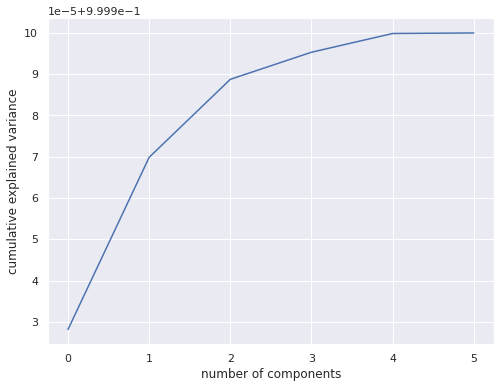

None

In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=6)
pca_test.fit(X_train)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [ ]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
model_pca = reg.fit(X_train_pca, y_train)

We can yse 3 components and have more than 90% of the data

In [ ]:
r = model_pca.score(X_train_pca, y_train)
print('R^2:', r)
y_pred_pca = model_pca.predict(X_test_pca)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))
print('MAE', metrics.mean_absolute_error(y_test, y_pred_pca))

R^2: 0.9977420096409032
RMSE: 1674.1363487873912
MAE 546.2971272780277


We tried 3 different models: multiple linear regression, lasso regression and multiple linear regression with pca. We can see that the multiple linear regression is a good model for this problem. We have an R^2 of 0.9983 for the multiple linear regression without pca and a R^2 of 0.99977 for the multiple linear regression with pca.

The RMSE for the first model is 33324.08 and for the model with pca is 3348.27 and the MAE for the the first model is 975.95 and for the second model is 1092.59.

Both are close but we can use the multiple linear regression model without the pca. (the errors are reasonable as the average of offences is 33856.27

> ### **Modelling methods**

In [ ]:
df_col = df_clean.loc[:,col]
y = df_clean['sum']

In [ ]:
dummies= pd.get_dummies(df_clean[['Agency Type']])
df_model = pd.concat([df_col,dummies], axis=1)
df_model.shape

(5235, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_model,y, test_size=0.25, random_state=1)

In [ ]:
scaler = StandardScaler().fit(X_train) 
X_train_sd = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_sd = scaler.transform(X_test)

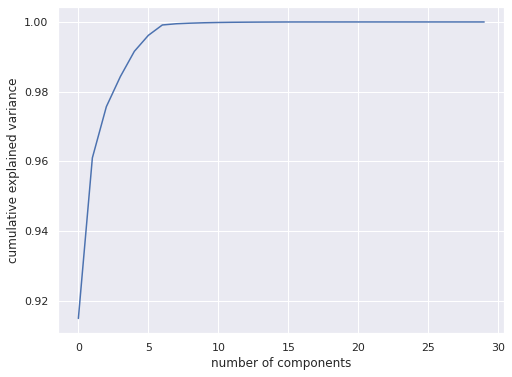

None

In [ ]:


pca_test = PCA(n_components=30)
pca_test.fit(X_train)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [ ]:
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
models = {
    "                   LinearRegression": LinearRegression(normalize=True),
    "                   robust regression": RANSACRegressor(base_estimator=LinearRegression(), max_trials=100),
    "                         ridge": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "lasso": Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42),
    "   elastic net": ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42),
    "                         gradient":  SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000),
    "                   random forest": RandomForestRegressor(n_estimators=1000),
    "svm" : SVR(kernel='rbf', C=1000000, epsilon=0.001)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    print(name + " trained.")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


                   LinearRegression trained.
                   robust regression trained.
                         ridge trained.
lasso trained.
   elastic net trained.
                         gradient trained.
                   random forest trained.
svm trained.


> ### **Models evaluation**

In [ ]:
for name, model in models.items():
    test_pred = model.predict(X_test_pca)
    print(name)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

                   LinearRegression
RMSE: 25737.84167067037
                   robust regression
RMSE: 1580607.6027124636
                         ridge
RMSE: 25741.105193630905
lasso
RMSE: 25289.821613345095
   elastic net
RMSE: 25739.15228083981
                         gradient
RMSE: 6873516298495.902
                   random forest
RMSE: 27907.27717852327
svm
RMSE: 29274.62200544725


In [ ]:
for name, model in models.items():
    test_pred = model.predict(X_test_pca)
    print(name)
    print('MAE', metrics.mean_absolute_error(y_test, test_pred))

                   LinearRegression
MAE 8785.655880037235
                   robust regression
MAE 132618.4642423557
                         ridge
MAE 8787.014254889958
lasso
MAE 9170.872933115463
   elastic net
MAE 8786.198716411855
                         gradient
MAE 2392414206415.378
                   random forest
MAE 8384.113936431046
svm
MAE 8733.947990646311


In [ ]:
for name, model in models.items():
    test_pred = model.predict(X_test_pca)
    print(name)
    r = model.score( X_train_pca, y_train)
    print('R^2:', r)

                   LinearRegression
R^2: 0.8951286899859386
                   robust regression
R^2: -901.6015393488531
                         ridge
R^2: 0.8951285573891679
lasso
R^2: 0.8500257187582758
   elastic net
R^2: 0.8951286687691619
                         gradient
R^2: -5.389701411672097e+16
                   random forest
R^2: 0.9758038024961105
svm
R^2: 0.9458558841683359


In [ ]:
from sklearn.model_selection import cross_val_score
m = RandomForestRegressor(n_estimators=1000)
print(cross_val_score(RandomForestRegressor(n_estimators=1000),X_train_pca, y_train,cv=5))

[0.77325185 0.81834725 0.76405119 0.84446158 0.86665352]


In [ ]:
for name, model in models.items():
    test_pred = model.predict(X_test_pca)
    print(name)
    print('MSE:', (metrics.mean_squared_error(y_test, test_pred)))

                   LinearRegression
MSE: 662436493.8644961
                   robust regression
MSE: 2498320393752.4414
                         ridge
MSE: 662604496.589572
lasso
MSE: 639575077.2348167
   elastic net
MSE: 662503960.1362612
                         gradient
MSE: 4.724522630568881e+25
                   random forest
MSE: 778816119.5189257
svm
MSE: 857003493.5618165


> # **8- Conclusion**
---

Based on the results we chose Random Forest as our model

# **9- Visualizing in Tableau**